# MAC-LRN Case Study
   ## Members:
   ### Caguiat, EJ
   ### Caro, Patricia
   ### Dienzo, Jericho Rafael
 
## Dataset: "Titanic: Machine Learning from Disaster"

 
 
 
 


# Introduction of the problem and dataset
### The training dataset that we are currently using describes different features for each passenger aboard the Titanic and shows whether or not they survived. The task is to correctly classify whether or not a given person with a given set of features (from the test dataset) would survive based on the training dataset.
#### The link to the kaggle dataset that we used: https://www.kaggle.com/c/titanic

# List of requirements
### The list of requirements that we used, and what we think are necessary in order to tackle this problem, are:
#### - Pandas (A Python library built on NumPy which is commonly used for machine learning problems)
#### - NumPy (A Python library used to process numerical data)
#### - The Kaggle Dataset (specifically the Titanic dataset) which can be obtained from the link provided above
#### - Matplotlib (A Python library used for plotting)
#### - Seaborn (A Python for data visualization)

### Import of necessary libraries and data sets

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
trainfile = pd.read_csv("/Users/Jericho/Documents/Subjects/MAC-LRN/all/train.csv")
testfile = pd.read_csv("/Users/Jericho/Documents/Subjects/MAC-LRN/all/test.csv")

# Data analysis
### The dataset that we used had many different features per person, all of which we deemed necessary in determining whether or not the person would live, except for the Passenger ID, ticket field and cabin(more on this later). There were many anomalies in the dataset, such as null fields, fields that contained different datatypes than intended (int fields having chars), etc. Thus the data cleaning.

#### The data in the training dataset
#### We can see in the given dataset that the Passenger ID is simply a unique identifier and would not be needed in determining whether or not a person survives
#### The Ticket is also given, although it is very hard to attribute it to any part of a person's survivability. The number given is also vague, thus a correlation between the Train column and the other columns could not be established.

In [6]:
print(trainfile)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

#### Graph showing the amount of people that survived or did not survive

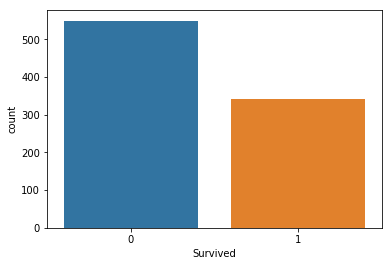

In [7]:
sns.countplot(x='Survived', data=trainfile);

# Data Cleaning
### The removal of PassengerId was done because it had no bearing on whether or not the person would survive. 
### The removal of the Ticket field was also done for the same reasons as the PassengerId. It is also hard to identify exactly what the Ticket field is specifying (if anything at all).
### The cabin field might appear as important in determining whether or not a person lives as the other features/factors (after all, the people residing in nearest cabins to the top of the ship have a better chance of surviving), but upon closer inspection, one would come to realize that the Ticket field is nothing but an unnecessary field presenting redundant information. It presents the same data as the Fare and PClass, in that you can already derive a person's status from the Fare and PClass. We can then infer exactly what the person's social status is and, as a result, be able to infer where they are staying on the ship. 

In [8]:
columnsdropped = ['PassengerId', 'Ticket', 'Cabin']
trainfile.drop(columnsdropped, inplace = True, axis = 1)
for x in range(0, trainfile['Age'].size - 1):
    if pd.isnull(trainfile.Age.iloc[x]):
        trainfile.at[x, 'Age'] = np.random.uniform(low = trainfile.Age.min(), high = trainfile.Age.max())